In [2]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2HDM with $Z_2$ symmetry

In [3]:
dim = 1000 # Number of (pseudo-)random numbers.

# The idea is to generate some (pseudo-)random numbers so as to find which combination is valid, in light of the analysis presented in the Master' Thesis associated with this code.

rho_3 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_4 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_5 = np.random.default_rng().uniform(0,5,dim) # rho_5 is |rho_5|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

gamma = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_5.

In [4]:
def search_minimum_values(rho_3_param,rho_4_param,rho_5_param,dim_parameter,epsilon):

    # This function finds the valid values for the parameters of the 2HDM potential.

    r2 = np.linspace(0,1,200) # r2 is r^2, which takes values from 0 to 1.
    cosine_gamma_plus_beta = np.linspace(-1,1,200) # cosine_gamma_plus_beta is cos(γ+β), whose values vary from -1 to 1.
    x = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    y = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    #
    rho_3_eff_min_valid = []
    rho_3_eff = np.zeros((len(r2),len(cosine_gamma_plus_beta)))
    rho_3_eff_min = np.zeros(dim_parameter)
    #
    for k in range(0,dim_parameter):
        #
        for i in range(0,len(r2)):
            for j in range(0,len(cosine_gamma_plus_beta)):
                rho_3_eff[i,j] = rho_3_param[k]+r2[i]*(rho_4_param[k]+rho_5_param[k]*cosine_gamma_plus_beta[j])
        #
        rho_3_eff_min[k] = np.min(rho_3_eff)
        V = (1/2)*x**2+(1/2)*y**2+rho_3_eff_min[k]*x*y
        #
        if np.min(V) >= -epsilon: ##The minus sign is to include 0.
            rho_3_eff_min_valid.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(rho_3_eff_min[k])])
            
            # It is possible to use the following code in order to work with np.float64:
            # rho_3_eff_min_valid.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],rho_3_eff_min[k]])
    #
    if not rho_3_eff_min_valid == []:
        return rho_3_eff_min_valid # First element: rho_3, Second element: rho_4, Third element: |rho_5|, Fourth element: rho_3_eff_min.
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')

In [5]:
# Results

valid_values = search_minimum_values(rho_3,rho_4,rho_5,dim,10**(-5))
valid_values

[[3.527555712632889,
  3.6897259833547427,
  1.0711931163170407,
  3.527555712632889],
 [2.286269425658693,
  0.3757728594781282,
  3.2156459605775076,
  -0.5536036754406863],
 [0.4781474079717718,
  4.095548064571513,
  0.6051387198410568,
  0.4781474079717718],
 [-0.3029105035914643,
  2.8975796022237867,
  1.3806868165766317,
  -0.3029105035914643],
 [3.120307191374124,
  -0.9228591658398759,
  1.2387679384887247,
  0.9586800870455234],
 [3.9659742485139624,
  -2.406854316433579,
  0.8135385494538155,
  0.7455813826265678],
 [3.5246621706397363,
  0.5022071658946938,
  1.766790527088521,
  2.2600788094459094],
 [3.863281430193389,
  -0.5530351260108723,
  0.3358579831805325,
  2.9743883210019844],
 [4.91047773210116,
  0.18397703924801512,
  4.763127920574844,
  0.33132685077433166],
 [3.748504649143152, 2.401991056871755, 0.9582980301090388, 3.748504649143152],
 [3.9820422404792257,
  -1.2986907534863734,
  0.26550683294227717,
  2.417844654050575],
 [3.860181510186546,
  3.6430762

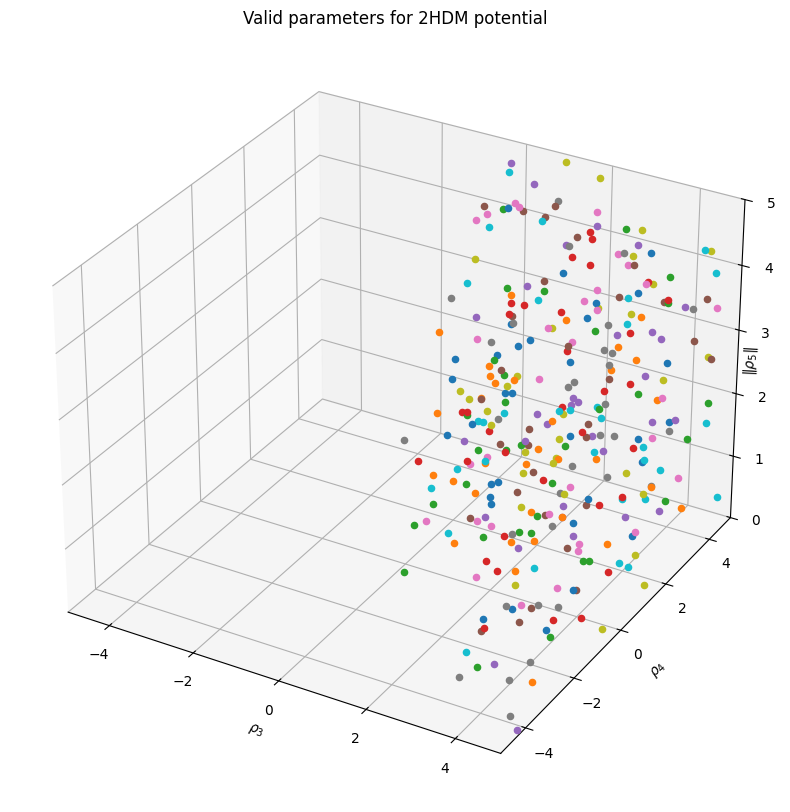

In [6]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(valid_values)-1,len(valid_values)):
    #
    ax.scatter(valid_values[int(point)][0],valid_values[int(point)][1],valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

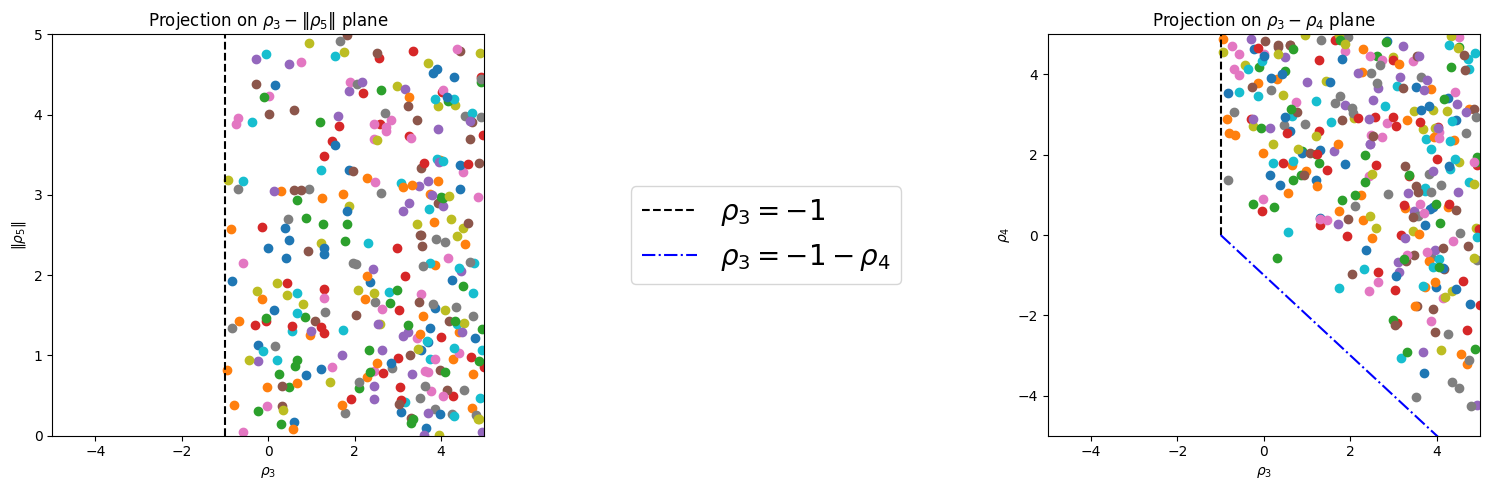

In [7]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [8]:
# Check!

search_minimum_values([0],[0],[0],1,10**(-5))

# As rho_3=rho_4=rho_5=0, then rho_3_eff_min=0, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[0.0, 0.0, 0.0, 0.0]]

In [9]:
# Check!

search_minimum_values([-2],[0],[0],1,10**(-5))

# As rho_3=-2 and rho_4=rho_5=0, then rho_3_eff_min=-2, which is NOT greater than -1, so this values are NOT valid (Error message arises).

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [10]:
# Check!

search_minimum_values([1],[0],[0],1,10**(-5))

# As rho_3=1 and rho_4=rho_5=0, then rho_3_eff_min=1, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[1.0, 0.0, 0.0, 1.0]]

# 2HDM without $Z_2$ symmetry

In [11]:
dim = 100

# Same parameters as above.

rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)

rho_6 = np.random.default_rng().uniform(0,5,dim) # rho_6 is |rho_6|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_6.

rho_7 = np.random.default_rng().uniform(0,5,dim) # rho_7 is |rho_7|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 #Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

xi = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_7.

In [12]:
def search_minimum_values_for_Z2_violating_2HDM(rho_3_param,rho_4_param,rho_5_param,gamma_param,rho_6_param,alpha_param,rho_7_param,xi_param,dim_param,epsilon_2):

    # The idea here is similar to the previous one but with much more parameters.

    r = np.linspace(0,1,50)
    beta = np.linspace(0,2*np.pi,50)
    chi = np.linspace(0,np.pi/2,50)
    #
    minimum_for_all = []
    V = np.zeros((len(r),len(beta),len(chi)))
    #
    for k in range(0,dim_param):
        #
        for i in range(0,len(r)):
            for j in range(0,len(beta)):
                for w in range(0,len(chi)):
                    V[i,j,w] = 2+((rho_3_param[k]+r[i]**2*(rho_4_param[k]+np.abs(rho_5_param[k])*np.cos(gamma_param[k]+beta[j])))-1)*(np.sin(2*chi[w]))**2+np.sin(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])+np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])+np.cos(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])-np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])))
        #
        if np.min(V) >= -epsilon_2:
            minimum_for_all.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(gamma_param[k]),float(rho_6_param[k]),float(alpha_param[k]),float(rho_7_param[k]),float(xi_param[k]),float(np.min(V))])
            
             # It is possible to use the following code in order to work with np.float64:
             # minimum_for_all.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],gamma_param[k],rho_6_param[k],alpha_param[k],rho_7_param[k],xi_param[k],np.min(V)])
    #
    if not minimum_for_all == []:
        return minimum_for_all
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')
    

In [13]:
# Results

search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))

[[4.452688440726348,
  2.0501526901745004,
  1.18720286612026,
  4.655999567000412,
  1.1729423414439006,
  1.4663842798357558,
  1.8995686647470382,
  3.066469082416348,
  1.3783580979535983],
 [0.8025699591719206,
  3.7610575822740238,
  2.0235722009398986,
  2.308137838964706,
  1.3745704604116649,
  5.114288869030039,
  3.861813383390707,
  4.34841785247996,
  1.3020497172676666],
 [2.5921835317355333,
  2.368457962285257,
  3.3905958404512337,
  0.6240235347697639,
  1.2201266191327402,
  5.933128416287189,
  0.3762871230381254,
  3.8570753523246246,
  1.812131815500281],
 [1.8096141427554526,
  2.7228291979880943,
  4.115291130103675,
  1.008375801004991,
  0.8792971531271176,
  1.3860972389860313,
  0.5229435631231194,
  5.493923849221647,
  0.8795178219356157],
 [2.1781118675497826,
  3.650785020877498,
  2.447151699712076,
  4.319815991741763,
  1.4167028812547267,
  6.208996494828127,
  2.0608115157286235,
  5.498892443063315,
  1.394831324506773],
 [0.7266738971664699,
  3.7

In [14]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([0],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([0],[0],[0],1,10**(-5))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0010273036248318]]

In [15]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([-2],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([-2],[0],[0],1,10**(-5))

# NOTE: This code might consider rho_3=-1 as a valid value because it is a limit case

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [16]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([1],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([1],[0],[0],1,10**(-5))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]

In [17]:
# Check!

# Reproduce Z_2-conserving 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
#
new_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),dim,10**(-5))
new_valid_values

[[3.780736877811732,
  3.0161814883194644,
  1.1631363350864459,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [3.9283659286605754,
  0.1266065320929517,
  4.120748143013317,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.94377701428486],
 [4.188555459233825,
  2.687839945426232,
  4.798283391364974,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [4.253330050142793,
  3.5212929319549975,
  0.6469479433745357,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [2.1400979413358154,
  3.7923618757859483,
  1.6948315070568576,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [2.370543905822757,
  1.4129889262117619,
  4.020275427677113,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.7727795159308861],
 [4.833351926792281,
  -1.1976660774868533,
  1.8934763588277204,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [2.6758388681977987,
  2.5388266495369525,
  3.7148635166452593,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [4.232444594181896,
  2.5539965574969505,
  3.600652388149931,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 

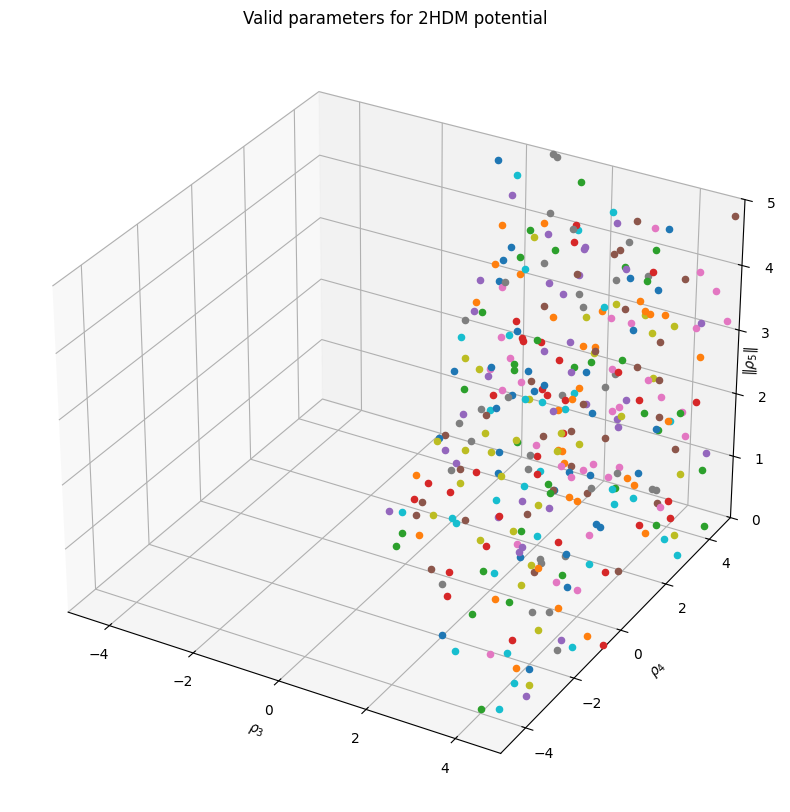

In [18]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(new_valid_values)-1,len(new_valid_values)):
    #
    ax.scatter(new_valid_values[int(point)][0],new_valid_values[int(point)][1],new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

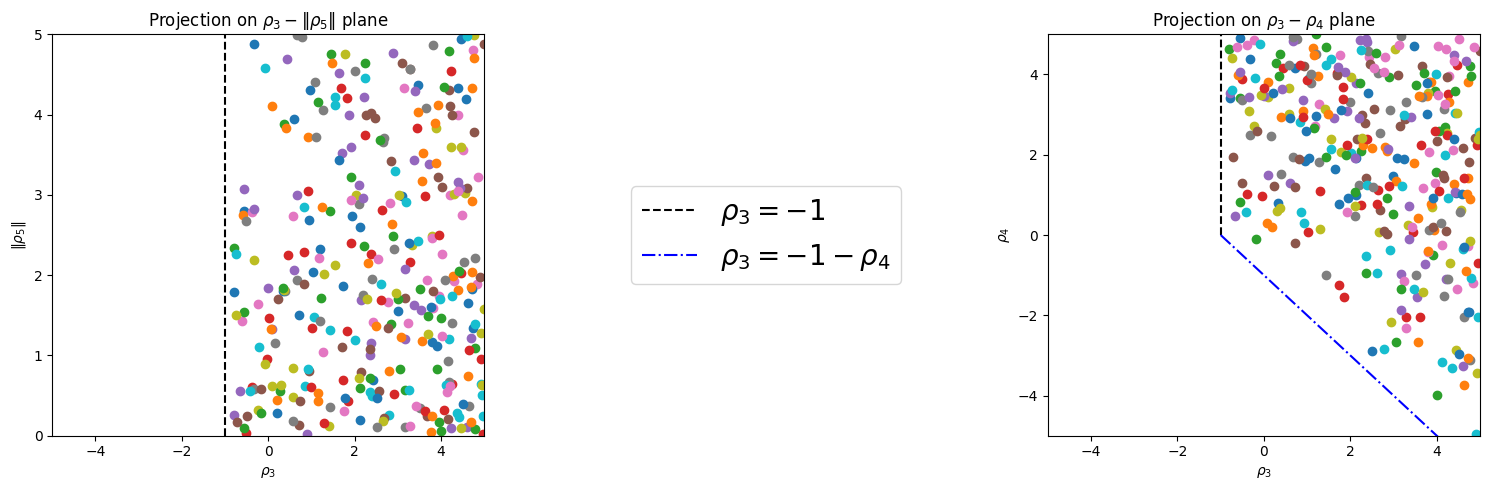

In [19]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [20]:
# Explore Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_valid_values

[[2.7539410120383723,
  4.352843663857959,
  1.7203742711073966,
  0.1670715708075514,
  2.2880914011959903,
  5.291624301431429,
  3.0233012609773646,
  3.873654594551401,
  1.3903097459618259],
 [0.7521510326975864,
  1.1435792735726835,
  1.5460990442580325,
  3.955157229219076,
  0.18875825487582043,
  2.2308045827208764,
  1.7169282032783595,
  2.227620012243762,
  0.4512770240963948],
 [4.196388091072405,
  0.40647905595252976,
  1.261668849318574,
  3.5062919332447486,
  0.3302601345254802,
  3.401994412587295,
  2.691547220897853,
  1.2235344893224231,
  0.4830520438054582],
 [4.578941292365053,
  2.5169340614697786,
  2.604291948444094,
  1.9754568033760789,
  1.7884400622829755,
  3.601356216038109,
  4.778584167479032,
  5.495448170379358,
  0.22660865085606252],
 [4.155975955318045,
  -1.136930621947052,
  3.2044737913936805,
  0.6290206463218527,
  2.1858358671310034,
  5.719795026268961,
  0.24614885826038047,
  2.6985039971921365,
  1.319017333264504],
 [4.55911022203664

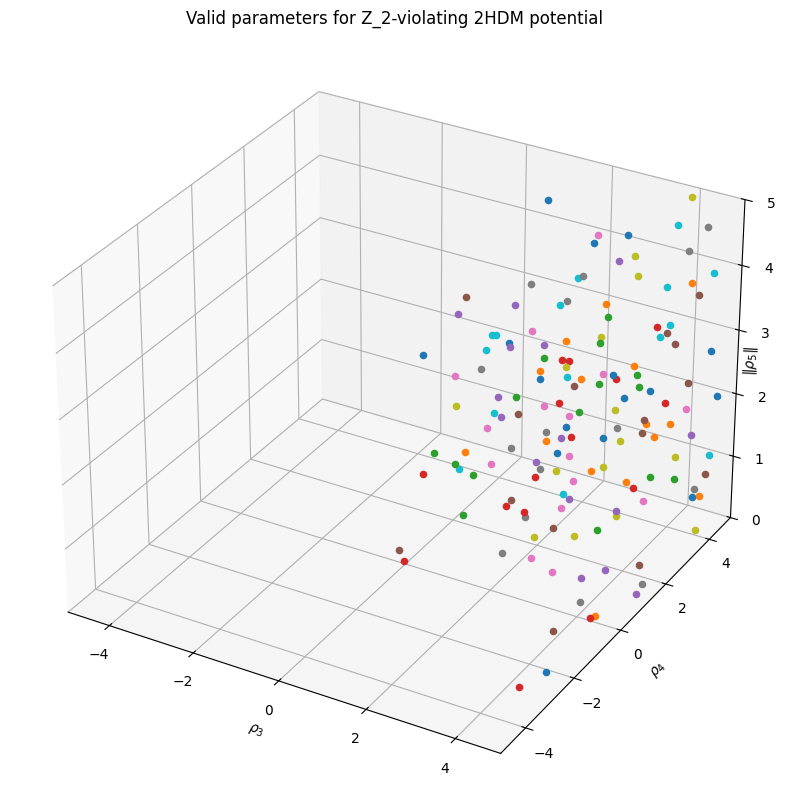

In [21]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(Z2_violating_valid_values)-1,len(Z2_violating_valid_values)):
    #
    ax.scatter(Z2_violating_valid_values[int(point)][0],Z2_violating_valid_values[int(point)][1],Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for Z_2-violating 2HDM potential')

plt.show()

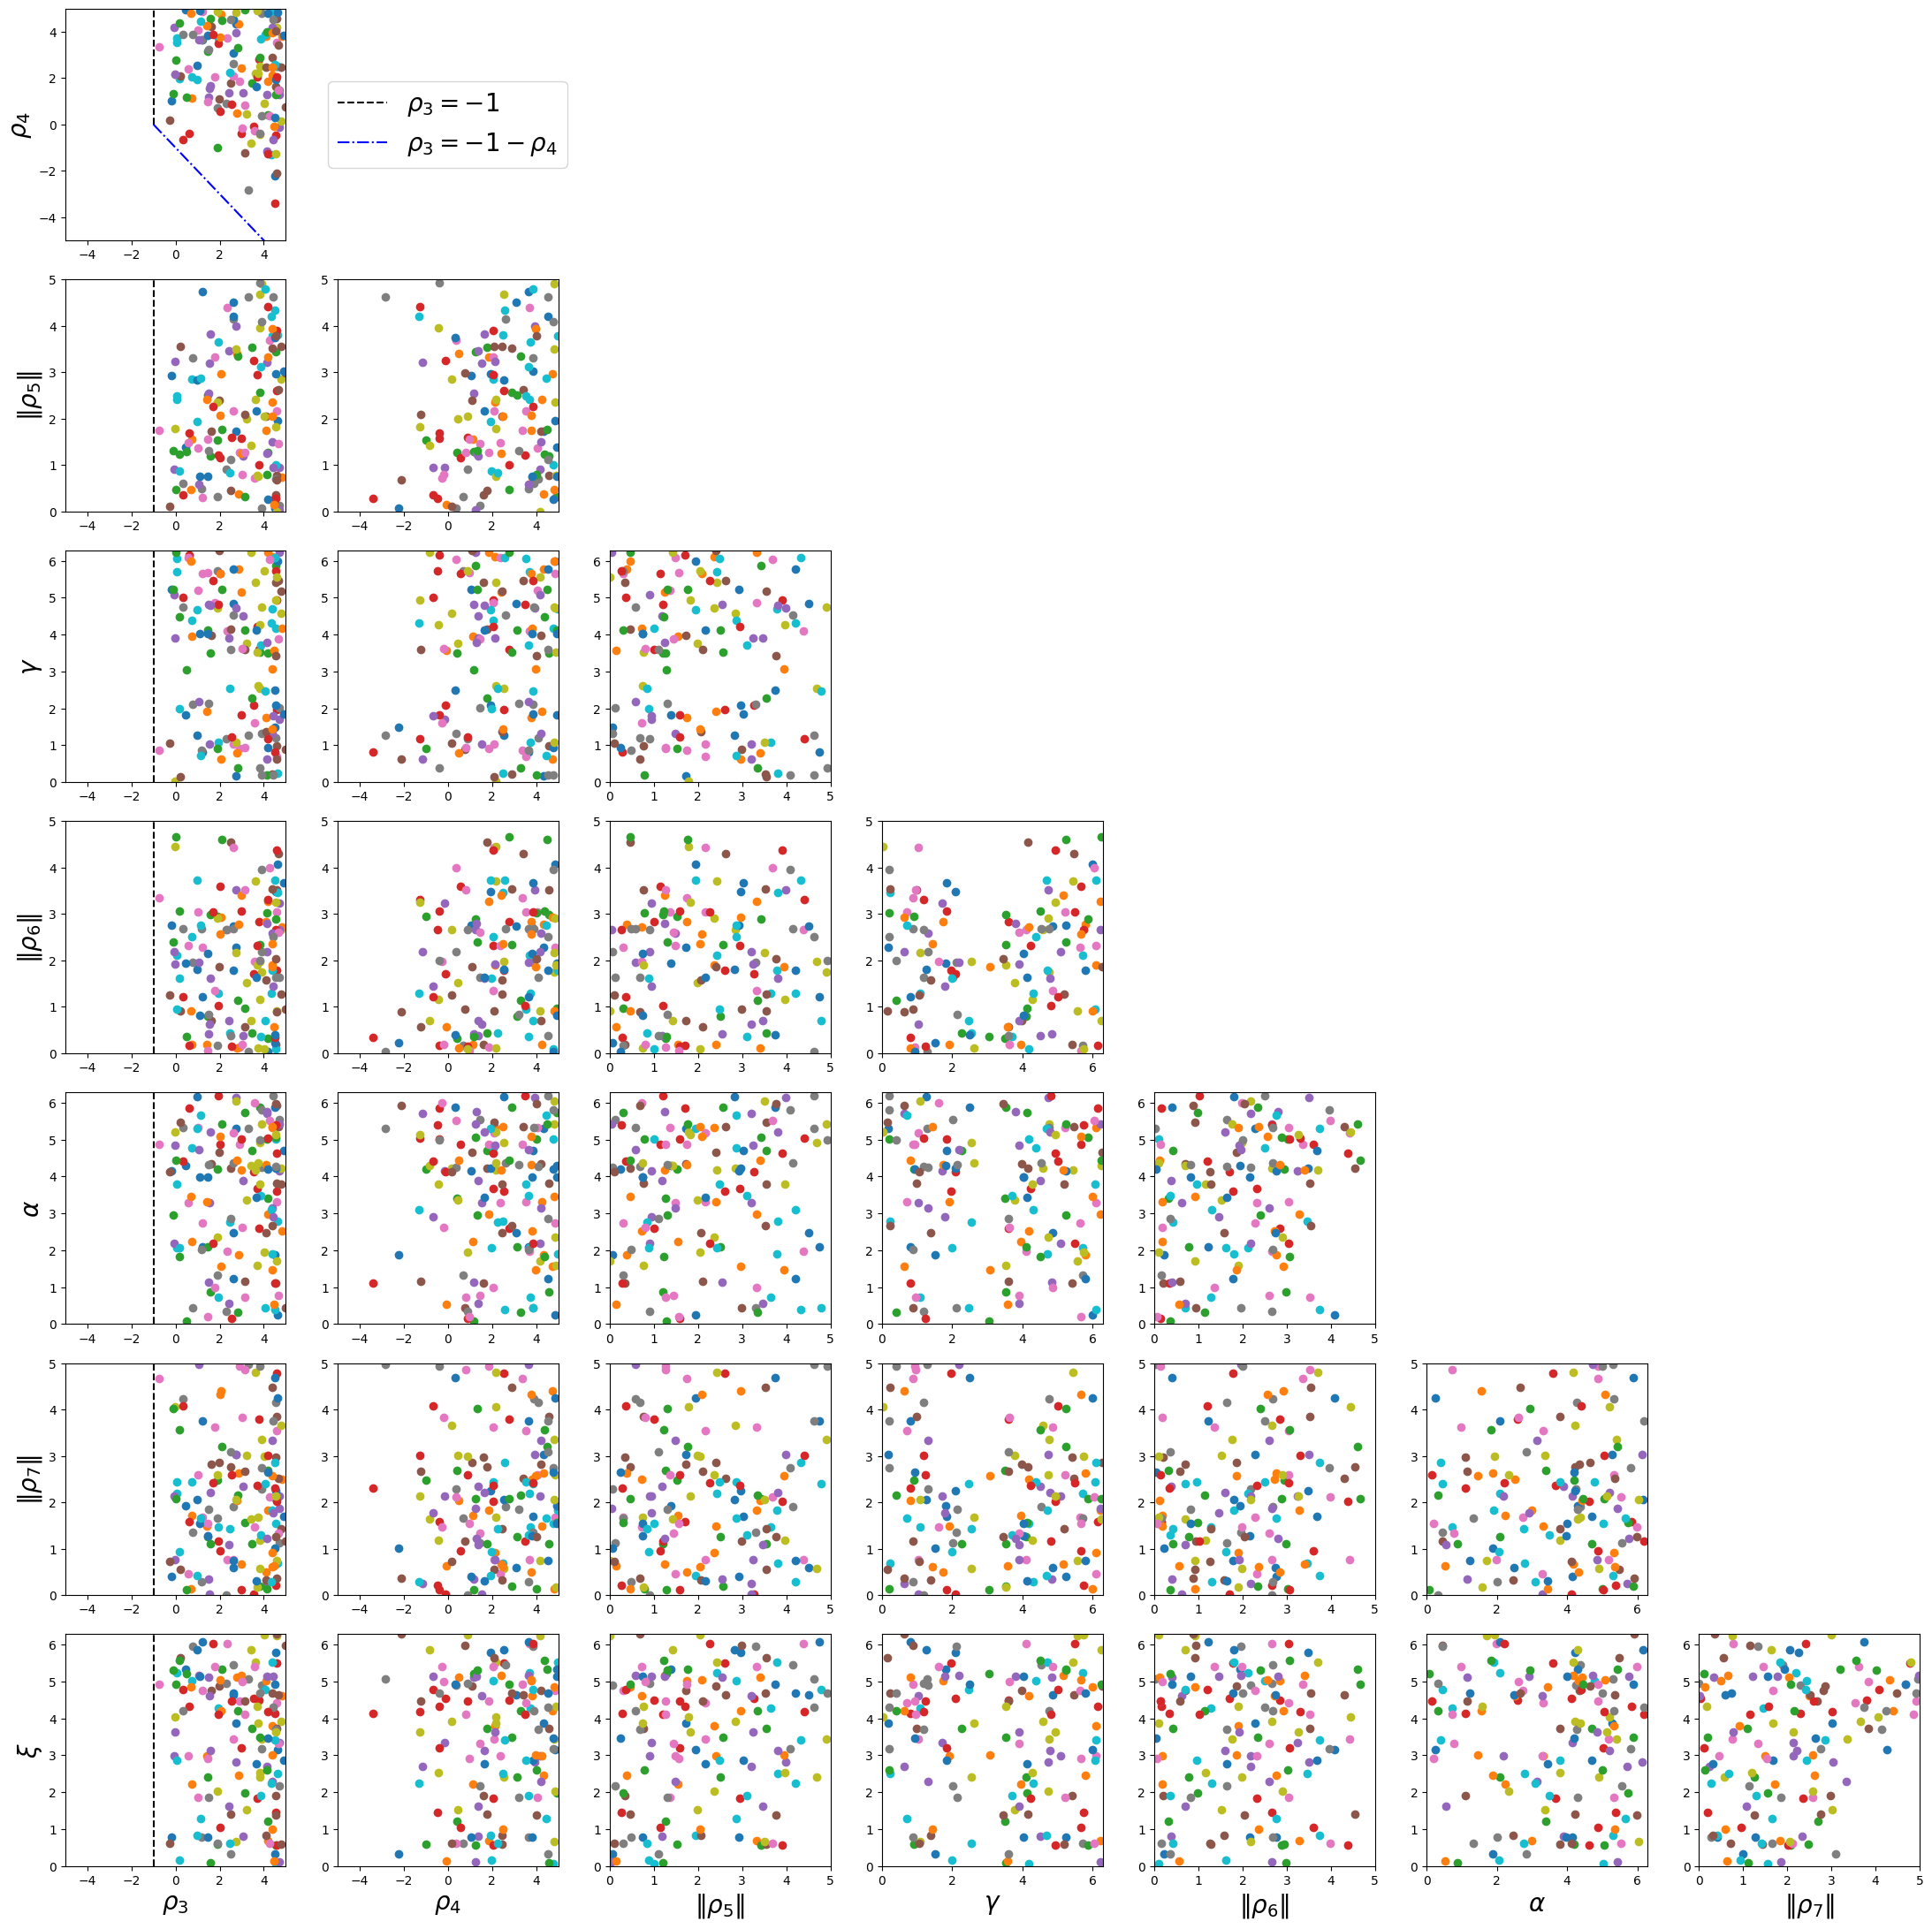

In [22]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][6], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

In [23]:
# Explore Z_2-violating 2HDM results with rho_3<-1 (these values are impossible in the 2HDM with Z_2 symmetry)

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [24]:
# Extend the limits in order to explore Z_2-violating 2HDM results with rho_3<-1

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-10,10,dim)
rho_5 = np.random.default_rng().uniform(0,10,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,10,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,10,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.
